# This Assignment is done by N M Emran Hussain, GWID: 24414095

## Reading Bikeshare data of 2024 February, March and April

In [2]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB


## Bike Availibility: Number of Pick-ups

In [4]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availibility: Number of Drop-offs

In [5]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merging the tables of Bike and Dock availibility

In [6]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


## Visualize pickups and dropoffs

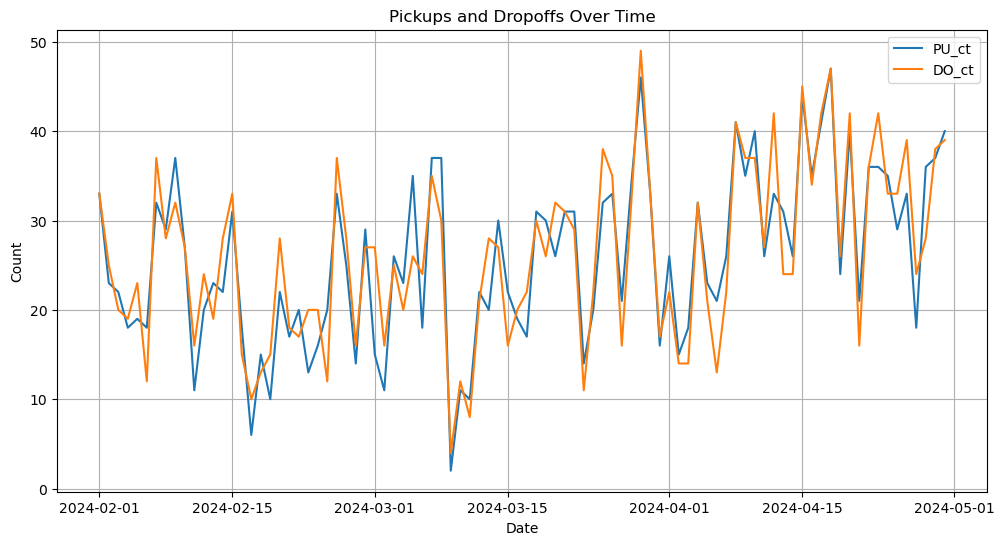

In [7]:
# plot line chart showing the PU_count and DO_count over time
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(PU_DO_counts.index, PU_DO_counts['PU_ct'], label='PU_ct')
plt.plot(PU_DO_counts.index, PU_DO_counts['DO_ct'], label='DO_ct')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend()
plt.grid(True)

plt.show()

## Reading the file of DC Weather data

In [7]:
df_weather = pd.read_csv('DC_weather_2024.csv')
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust          366 non-null    float64
 1

## Dropping uncessary variables

In [9]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

In [10]:
df_weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,0.0,...,13.6,327.2,1017.6,90.3,9.9,11.7,0.9,1,0.68,cloudy
1,2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,0.0,...,18.1,327.7,1020.6,47.5,9.9,96.5,8.3,5,0.72,partly-cloudy-day
2,2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,0.0,...,8.8,210.9,1018.1,68.7,9.9,113.2,9.6,5,0.75,partly-cloudy-day
3,2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,0.0,...,21.8,329.2,1018.9,68.5,9.9,54.2,4.8,4,0.78,partly-cloudy-day
4,2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,0.0,...,13.2,303.8,1026.9,44.5,9.9,132.6,11.6,5,0.81,partly-cloudy-day


## Preparing X and y: Merge df_weather with PU_DO_counts

In [11]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


## Visualizing pickups and dropoffs

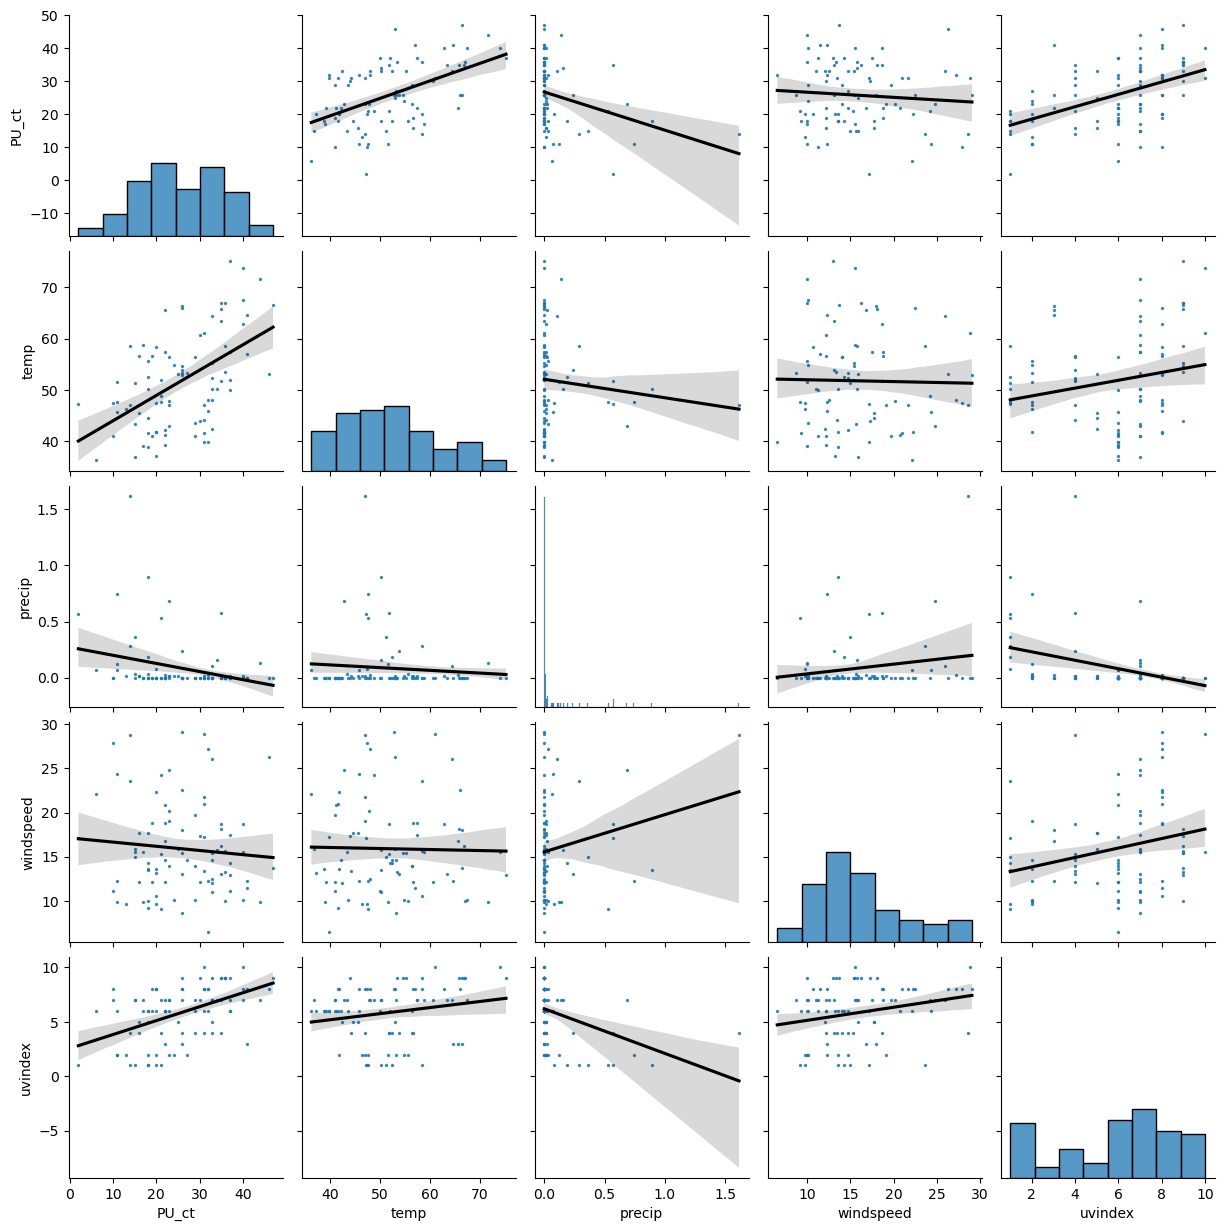

In [12]:
import seaborn as sns
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

## Prepare training and test data

In [13]:
# we have two target variables: PU_ct and DO_ct and five indpendent catagorical variables
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## Train_test_split with y=['PU_ct','DO_ct'].

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

## Task 1: Train a linear regression model with a single feature ('temp') for PU_ct, and report the training and test MSE, respectively.

This script essentially sets up a basic predictive model to understand how changes in 'temp' predicting the number of pickups ('PU_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['PU_ct']]
X = merged_df[['temp']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_1 = mean_squared_error(y_train, y_train_pred)
test_mse_1 = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using one feature : {train_mse_1}")
print(f"Test MSE of test data using one feature: {test_mse_1}")


Training MSE of training data using one feature : 64.63185358976104
Test MSE of test data using one feature: 71.53543417972891


## Task 2: Train a linear regression model with two feature ('temp' and 'precip') for PU_ct, and report the training and test MSE, respectively.

This script essentially sets up a basic predictive model to understand how changes in 'temp' & 'precip' predicting the number of pickups ('PU_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['PU_ct']]
X = merged_df[['temp', 'precip']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_2 = mean_squared_error(y_train, y_train_pred)
test_mse_2 = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using two features : {train_mse_2}")
print(f"Test MSE of test data using two features: {test_mse_2}")

Training MSE of training data using two features : 61.454167225797
Test MSE of test data using two features: 65.02373285537077


## Task 3: Train a linear regression model with features ('temp','precip','windspeed') for PU_ct, and report the training and test MSE, respectively.

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip' & 'windspeed' predicting the number of pickups ('PU_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['PU_ct']]
X = merged_df[['temp', 'precip', 'windspeed']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_3 = mean_squared_error(y_train, y_train_pred)
test_mse_3 = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using three features : {train_mse_3}")
print(f"Test MSE of test data using three features: {test_mse_3}")

Training MSE of training data using three features : 61.4322641173538
Test MSE of test data using three features: 65.3813722910624


## Task 4: Train a linear regression model with features ('temp','precip','windspeed','uvindex') for PU_ct, and report the training and test MSE, respectively.

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip', 'windspeed' & 'uvindex' predicting the number of pickups ('PU_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['PU_ct']]
X = merged_df[['temp', 'precip', 'windspeed', 'uvindex']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_4 = mean_squared_error(y_train, y_train_pred)
test_mse_4 = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using four features : {train_mse_4}")
print(f"Test MSE of test data using four features: {test_mse_4}")

Training MSE of training data using four features : 52.58457605801069
Test MSE of test data using four features: 48.38692187059774


## Task 5: Train a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for PU_ct, and report the training and test MSE, respectively.

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip', 'windspeed', 'uvindex' & 'icon' predicting the number of pickups ('PU_ct'). The function 'pd.get_dummies()' is used to convert the categorical variable icon into dummy/indicator variables. This is necessary because most machine learning algorithms require numerical input, so categorical data needs to be converted. The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Preparing the training and test data
y = merged_df['PU_ct']
X = pd.get_dummies(merged_df[['temp', 'precip', 'windspeed', 'uvindex', 'icon']], columns=['icon'], drop_first=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_5 = mean_squared_error(y_train, y_train_pred)
test_mse_5 = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using five features : {train_mse_5}")
print(f"Test MSE of test data using five features: {test_mse_5}")

Training MSE of training data using five features : 45.62027690029117
Test MSE of test data using five features: 59.659317806457906


## Task 6: Based on the previous results, plot the changes in training and test MSEs as more features are added to the linear regression model.

This code is designed to assess how adding more features to a regression model affects its performance, indicated by changes in the MSE for both training and testing datasets. This visualization helps identify overfitting or underfitting and determine the optimal complexity of the model based on the included features.

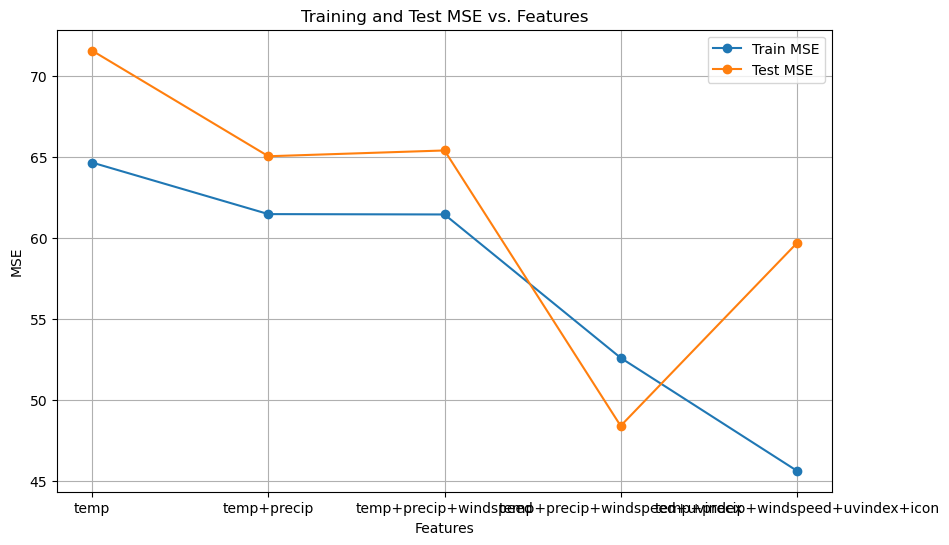

In [32]:
# Collect MSE values from previous tasks:
mse_data = {
    'Features': ['temp', 'temp+precip', 'temp+precip+windspeed', 'temp+precip+windspeed+uvindex', 'temp+precip+windspeed+uvindex+icon'],
    'Train_MSE': [train_mse_1, train_mse_2, train_mse_3, train_mse_4, train_mse_5],
    'Test_MSE': [test_mse_1, test_mse_2, test_mse_3, test_mse_4, test_mse_5]
}
mse_df = pd.DataFrame(mse_data)

# Plot the MSE values:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mse_df['Features'], mse_df['Train_MSE'], label='Train MSE', marker='o')
plt.plot(mse_df['Features'], mse_df['Test_MSE'], label='Test MSE', marker='o')
plt.xlabel('Features')
plt.ylabel('MSE')
plt.title('Training and Test MSE vs. Features')
plt.legend()
plt.grid(True)
plt.show()


## Task 7: Based on the above plot, identify the best combination of features for PU_ct prediction in linear regression.

The optimal feature combination for predicting PU_ct, our target variable, involves the use of four features. This configuration yields the lowest mean squared error (MSE) on the test data. Thus, the model with four features ('temp' + 'precip' + 'windspeed' + 'uvindex') is likely the best balance between fitting the training data well and generalizing effectively to new data.

## Task 8: Conduct Task 1-7 again for DO_ct prediction.

### Repetation of Task 1 for number of drop-offs (DO_ct)

This script essentially sets up a basic predictive model to understand how changes in 'temp' predicting the number of drop-offs ('DO_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['DO_ct']]
X = merged_df[['temp']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_a = mean_squared_error(y_train, y_train_pred)
test_mse_a = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using one feature : {train_mse_a}")
print(f"Test MSE of test data using one feature: {test_mse_a}")

Training MSE of training data using one feature : 69.37157438001258
Test MSE of test data using one feature: 80.1876296891039


### Repetation of Task 2 for number of drop-offs (DO_ct)

This script essentially sets up a basic predictive model to understand how changes in 'temp' & 'precip' predicting the number of drop-offs ('DO_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['DO_ct']]
X = merged_df[['temp', 'precip']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_b = mean_squared_error(y_train, y_train_pred)
test_mse_b = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using two features : {train_mse_b}")
print(f"Test MSE of test data using two features: {test_mse_b}")

Training MSE of training data using two features : 59.300456147167374
Test MSE of test data using two features: 74.44668505466156


### Repetation of Task 3 for number of drop-offs (DO_ct)

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip' & 'windspeed' predicting the number of drop-offs ('DO_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['DO_ct']]
X = merged_df[['temp', 'precip', 'windspeed']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_c = mean_squared_error(y_train, y_train_pred)
test_mse_c = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using three features : {train_mse_c}")
print(f"Test MSE of test data using three features: {test_mse_c}")

Training MSE of training data using three features : 59.27963855175449
Test MSE of test data using three features: 75.09769268740463


### Repetation of Task 4 for number of drop-offs (DO_ct)

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip', 'windspeed' & 'uvindex' predicting the number of drop-offs ('DO_ct'). The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecting the feature and target
y = merged_df[['DO_ct']]
X = merged_df[['temp', 'precip', 'windspeed', 'uvindex']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_d = mean_squared_error(y_train, y_train_pred)
test_mse_d = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using four features : {train_mse_d}")
print(f"Test MSE of test data using four features: {test_mse_d}")

Training MSE of training data using four features : 51.86587213124935
Test MSE of test data using four features: 62.98767545228343


### Repetation of Task 5 for number of drop-offs (DO_ct)

This script essentially sets up a basic predictive model to understand how changes in 'temp', 'precip', 'windspeed', 'uvindex' & 'icon' predicting the number of drop-offs ('DO_ct'). The function 'pd.get_dummies()' is used to convert the categorical variable icon into dummy/indicator variables. This is necessary because most machine learning algorithms require numerical input, so categorical data needs to be converted. The effectiveness of the model is evaluated using MSE, providing insights into how well the model might perform with new data.

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Preparing the training and test data
y = merged_df['DO_ct']
X = pd.get_dummies(merged_df[['temp', 'precip', 'windspeed', 'uvindex', 'icon']], columns=['icon'], drop_first=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculating MSE for Train and Test data
train_mse_e = mean_squared_error(y_train, y_train_pred)
test_mse_e = mean_squared_error(y_test, y_test_pred)

# Printing Results
print(f"Training MSE of training data using five features : {train_mse_e}")
print(f"Test MSE of test data using five features: {test_mse_e}")

Training MSE of training data using five features : 48.88214307964564
Test MSE of test data using five features: 65.20371376903877


### Repetation of Task 6 for number of drop-offs (DO_ct)

This code is designed to assess how adding more features to a regression model affects its performance, indicated by changes in the MSE for both training and testing datasets. This visualization helps identify overfitting or underfitting and determine the optimal complexity of the model based on the included features.

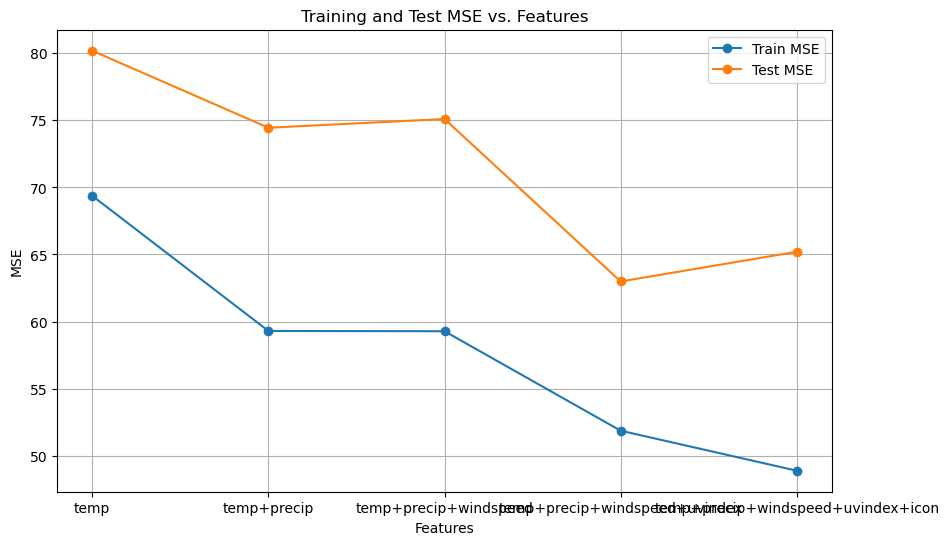

In [45]:
# Collect MSE values from previous tasks:
mse_data = {
    'Features': ['temp', 'temp+precip', 'temp+precip+windspeed', 'temp+precip+windspeed+uvindex', 'temp+precip+windspeed+uvindex+icon'],
    'Train_MSE': [train_mse_a, train_mse_b, train_mse_c, train_mse_d, train_mse_e],
    'Test_MSE': [test_mse_a, test_mse_b, test_mse_c, test_mse_d, test_mse_e]
}
mse_df = pd.DataFrame(mse_data)

# Plot the MSE values:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mse_df['Features'], mse_df['Train_MSE'], label='Train MSE', marker='o')
plt.plot(mse_df['Features'], mse_df['Test_MSE'], label='Test MSE', marker='o')
plt.xlabel('Features')
plt.ylabel('MSE')
plt.title('Training and Test MSE vs. Features')
plt.legend()
plt.grid(True)
plt.show()

### Repetation of Task 7 for number of drop-offs (Do_ct)

Based on this plot, the optimal number of features appears to be 4 for 'dock availibility : number of drop-offs' (DO_ct) predictor. This is indicated by the lowest point of the MSE for the testing data, where the model achieves the best generalization performance without overfitting. At 4 features, the best combination of features, based on this graph, is 'temp' + 'precip' + 'windspeed' + 'uvindex', as it provides the lowest and most stable MSE across both training and testing scenarios.